# Sales Data Analysis

### 1. Loading the dataset and libraries

In [17]:
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
raw_data = pd.read_csv('all_data_copy.csv')

In [4]:
data = raw_data.copy()
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### 2. Missing Value Treatment

In [6]:
# Check for Null Values
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
# Pulling out the rows which contain Null values to check for any pattern in the missing values.
data[data['Order ID'].isnull() == True]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


All the columns contain NaN for missing values making these rows redundant for analysis. So we'll drop them from the dataset.

In [10]:
data.dropna(axis = 0, inplace = True)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### 3. Changing column datatypes

When we tried to convert the datatypes for columns, the notebook gave an error saying there's still an invalid value present (Order ID = 'Order ID') which means the dataset still contains some unnecessary rows, let's check them first. 

In [14]:
data[data['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
data1 = data[data['Order Date'] != 'Order Date']
data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [19]:
# Converting the datatypes

data1['Order ID'] = data1['Order ID'].astype('int64')
data1['Quantity Ordered'] = data1['Quantity Ordered'].astype('int64')
data1['Price Each'] = data1['Price Each'].astype('float')
data1['Order Date'] = pd.to_datetime(data1['Order Date'])

In [20]:
data1.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

#### Q1. In which month the maximum sales was recorded?

In [25]:
# Adding Sales and Month column to the dataset

data1['Sales'] = data1['Quantity Ordered']*data1['Price Each']
data1['Month'] = data1['Order Date'].dt.month

In [24]:
data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [26]:
# Creating a pivot table for Monthwise Sales analysis

month_sales = pd.pivot_table(data1, index = 'Month', values = 'Sales', aggfunc = 'sum')
month_sales.sort_values(by = 'Sales')

,Sales
Month,
1,1822256.73
9,2097560.13
2,2202022.42
8,2244467.88
6,2577802.26
7,2647775.76
3,2807100.38
5,3152606.75
11,3199603.20


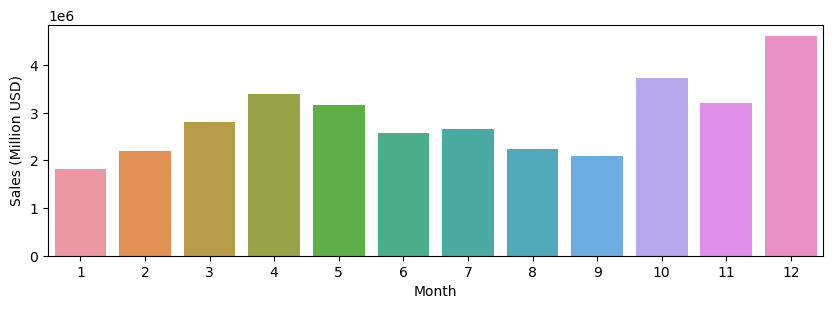

In [29]:
# Crearting a bar plot of month-wise sales
plt.figure(figsize = (10, 3), dpi = 100)
sns.barplot(x = month_sales.index, y = month_sales['Sales'])
plt.ylabel('Sales (Million USD)')
plt.show()

Last three months recorded the maximum sales becuase of the festival season. Haloween, Thanksgiving, Hanukkah are celebrated around October-November. And **December has the highest sales becuase of Christmas and New Year**

#### Q2. Which city generated the most revenue?

In [31]:
# Adding City column to dataset

data1['City'] = data1['Purchase Address'].str.split(',', expand = True)[1] + ' (' + (data1['Purchase Address'].str.split(',', expand = True)[2]).str.split(' ', expand = True)[1] + ')'

In [32]:
data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)


In [33]:
# Creating a pivot table for city-wise sales.
city_sales = pd.pivot_table(data1, index = 'City', values = 'Sales', aggfunc = 'sum')
city_sales.sort_values(by = 'Sales')

,Sales
City,
Portland (ME),449758.27
Austin (TX),1819581.75
Portland (OR),1870732.34
Seattle (WA),2747755.48
Dallas (TX),2767975.40
Atlanta (GA),2795498.58
Boston (MA),3661642.01
New York City (NY),4664317.43
Los Angeles (CA),5452570.80


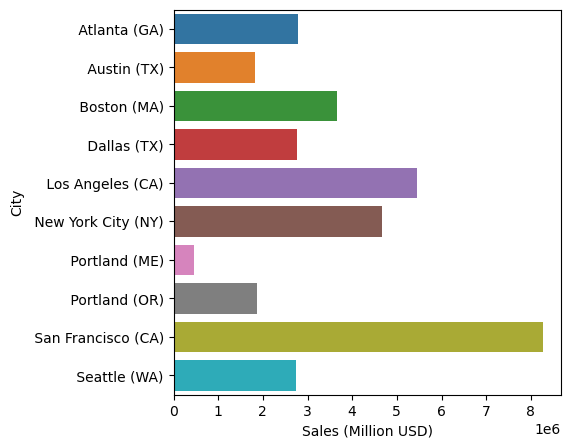

In [35]:
# Creating a bar plot for city-wise sales.
plt.figure(figsize = (5, 5), dpi = 100)
sns.barplot(y = city_sales.index, x = city_sales['Sales'])
plt.xlabel('Sales (Million USD)')
plt.show()

**San Francisco** recorded the highest Sales. San Francisco is the hub for Tech giants thus the city is populated with most Tech-savy people and population has a higher earnings as compared to rest of the cities. 

#### Q3. What is the ideal time for the company to run advertisements to maximize no. of orders?

In [36]:
# Adding Hour column to the dataset
data1['Order Hour'] = data1['Order Date'].dt.hour

In [40]:
# Creating a pivot table for no. of orders for each hour analysis
hourly_orders = pd.pivot_table(data1, index = 'Order Hour', values = 'Quantity Ordered', aggfunc = 'count')
hourly_orders.sort_values(by = 'Quantity Ordered')

,Quantity Ordered
Order Hour,
3,831
4,854
2,1243
5,1321
1,2350
6,2482
0,3910
7,4011
8,6256


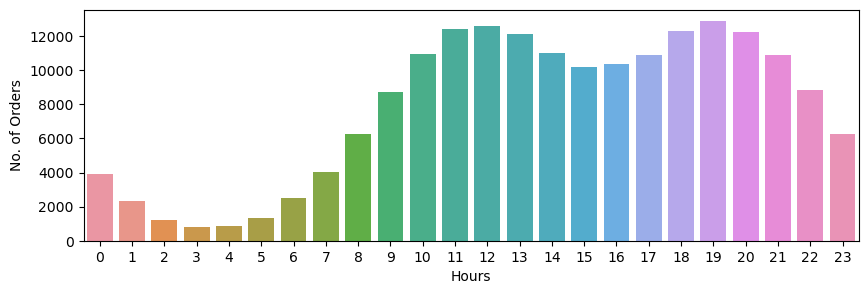

In [49]:
# Bar plot for hourly orders
plt.figure(figsize = (10, 3), dpi = 100)
sns.barplot(x = hourly_orders.index, y = hourly_orders['Quantity Ordered'])
plt.xlabel('Hours')
plt.ylabel('No. of Orders')
plt.show()

Around **10 AM** and around **5 PM** is the ideal time to run advertisements.

#### Q4. Which Product was sold the most?

In [47]:
# Creating a pivot table for no. of orders for each product.

product_quantity = pd.pivot_table(data1, index = 'Product', values = 'Quantity Ordered', aggfunc = 'sum')
product_quantity.sort_values(by = 'Quantity Ordered')

,Quantity Ordered
Product,
LG Dryer,646
LG Washing Machine,666
Vareebadd Phone,2068
20in Monitor,4129
ThinkPad Laptop,4130
Macbook Pro Laptop,4728
Flatscreen TV,4819
Google Phone,5532
34in Ultrawide Monitor,6199


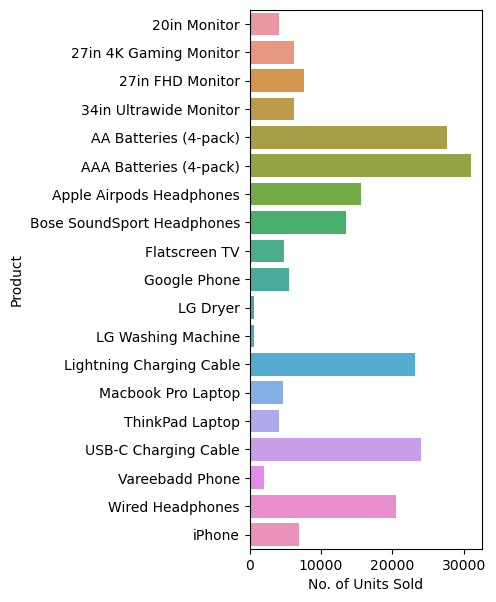

In [52]:
plt.figure(figsize = (3, 7), dpi = 100)
sns.barplot(y = product_quantity.index, x = product_quantity['Quantity Ordered'])
plt.xlabel('No. of Units Sold')
plt.show()

Highest Selling product on website is **AAA Batteries (4 Pack)**. And least sold product is LG Dryer. Since people are more reluctant to buy house appliences online and are more keen to buy cheaper products through website, we see this distribution.

#### Q5. What combination of Products was sold the most?

In the dataset, we see there are a few order IDs that have been repeated. That means multiple products have been purchased in the same Order ID. We need to distinguish them first from rest of the dataset.

In [58]:
# listing out all the Duplicate Order-IDs and storing them in a database called 'df'
df = data1[data1['Order ID'].duplicated(keep=False)]

# Grouping the 'df' dataframe by Order ID and concatenating the 'Product' column string to obtain a combination of products sold in each Order ID.
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [60]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Most Sold Product combination is **iPhone & Lightning Charging Cable**